<a href="https://colab.research.google.com/github/Rahamatunnisa1121/ML-Algorithms/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
print("\nMissing Values:\n",df.isnull().sum())


Missing Values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
#standardizing the data is essential before applying pca
from sklearn.preprocessing import StandardScaler
#StandardScaler is a preprocessing tool in sklearn that applies Z-score normalization (standardization).
x=df.iloc[:, :-1] #only features
y=df.iloc[:, -1] #only label
scaler=StandardScaler()# Initialize StandardScaler
x_scaled=scaler.fit_transform(x)
#fit Calculates the mean and standard deviation for each feature.
#transform Standardizes the data using the formula xscaled=x-mean/sd

In [ ]:
#applying pca
from sklearn.decomposition import PCA
#apply pca to reduce 2 dimensions
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)
#convert to dataframe as array is returned
pca_df=pd.DataFrame(x_pca,columns=['PC1','PC2'])
pca_df['target']=y
pca_df.head()

,PC1,PC2,target
0,-2.816339,0.506051,Iris-setosa
1,-2.645527,-0.651799,Iris-setosa
2,-2.879481,-0.321036,Iris-setosa
3,-2.810934,-0.577363,Iris-setosa
4,-2.879884,0.670468,Iris-setosa


In [ ]:
#how much information (variance) is retained after applying PCA
explained_variance=pca.explained_variance_ratio_
print(f"Explained Variance by PC1:{explained_variance[0]:.2f}")
print(f"Explained Variance by PC2:{explained_variance[1]:.2f}")

Explained Variance by PC1:0.75
Explained Variance by PC2:0.18


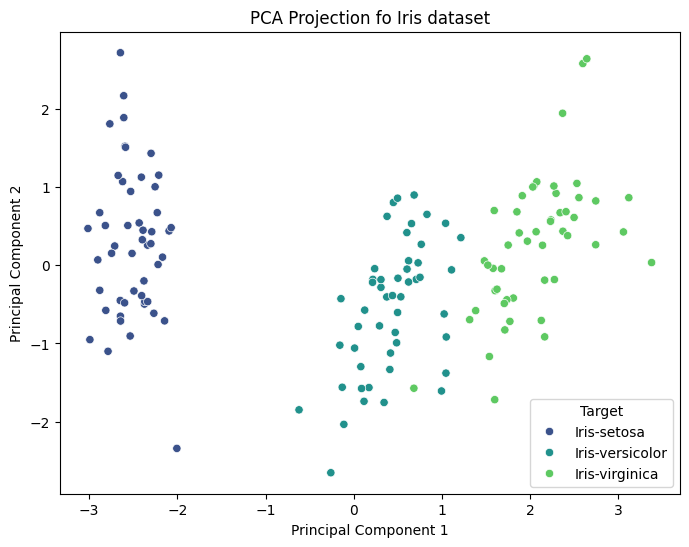

In [ ]:
#visualize the pca components
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],hue=pca_df['target'],palette='viridis')
plt.title("PCA Projection fo Iris dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Target")
plt.show()